In [28]:
import os
import pymongo as py

# Database info
client = py.MongoClient('mongodb://cosmo-feynman:4rDaE4LwLhwtwKCRIID7BV42Dpz9JOcj3H8kTDUqDmDbkmJiW4HqcGmktibeGWdAkFE5ZE8bQPvR1EncGLSiGA==@cosmo-feynman.documents.azure.com:10255/?ssl=true&replicaSet=globaldb')
db = client.ch

# Gather files of interest
files_of_interest = db.docs.find(
    {
        'filetype': 'pdf',
        'doctype': 'annual-returns',
        'extracted_hand': {'$exists': True}
    })

text_list = [x['extracted_hand'] for x in files_of_interest]

data = []
for item in text_list:
    if not isinstance(item, list):
        data.append(item)
    else:
        data.append(' '.join(item))        
print('Finished...')

In [29]:
### Create TF-IDF vectors ###
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)
print('Finished...')

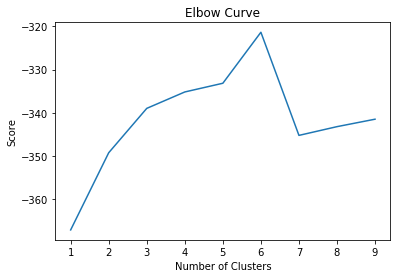

In [31]:
### Identify no. of clusters using elbow curve ###
import pylab as pl

# Load doc2vec model if not already loaded
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, init='k-means++', max_iter=100) for i in Nc]
# kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

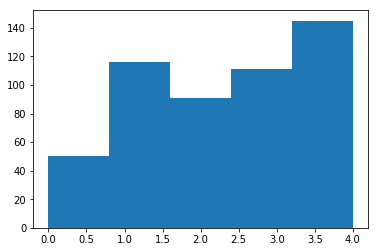

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

k = 5
kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=100)
kmeans_model.fit(X)

plt.hist(kmeans_model.labels_, bins=k)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 513 samples in 0.000s...
[t-SNE] Computed neighbors for 513 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 513 / 513
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 58.6127396, gradient norm = 0.4497133 (50 iterations in 0.504s)
[t-SNE] Iteration 100: error = 54.9527969, gradient norm = 0.4567761 (50 iterations in 0.445s)
[t-SNE] Iteration 150: error = 57.0852051, gradient norm = 0.4525658 (50 iterations in 0.572s)
[t-SNE] Iteration 200: error = 56.6620178, gradient norm = 0.4519627 (50 iterations in 0.490s)
[t-SNE] Iteration 250: error = 54.2832565, gradient norm = 0.4472823 (50 iterations in 0.447s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.283257
[t-SNE] Iteration 300: error = 0.4076918, gradient norm = 0.0268818 (50 iterations in 0.407s)
[t-SNE] Iteration 350: error = 0.3717993, gradient norm = 0.0252477 

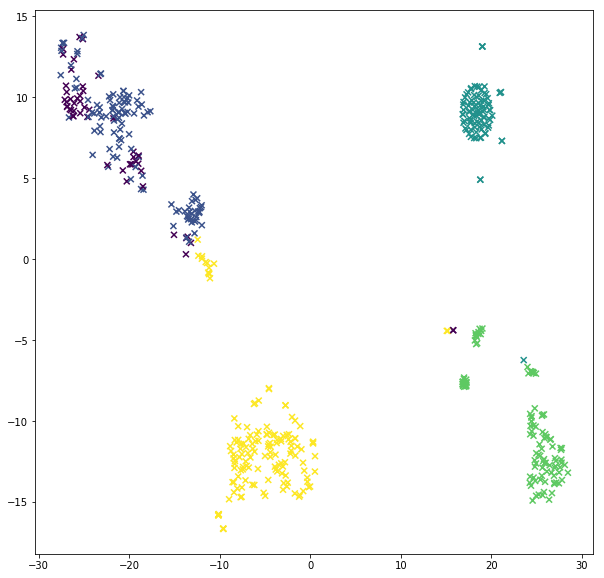

In [34]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(X)

tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans_model.labels_)
plt.show()

In [36]:
print("Top terms per cluster:\n")
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Top terms per cluster:

Cluster 0:
 company
 page
 number
 confirmation
 statement
 shares
 50
 date
 electronically
 filed


Cluster 1:
 company
 number
 confirmation
 statement
 page
 electronically
 filed
 document
 shares
 capital


Cluster 2:
 1薯
 ths
 홮晷
 력원
 te
 각릏
 표후毚
 3鳶
 tre
 주수


Cluster 3:
 company
 return
 shares
 shareholders
 number
 details
 date
 type
 share
 address


Cluster 4:
 company
 confirmation
 number
 statement
 delivered
 electronically
 filed
 document
 manager
 authorised




In [41]:
Y = vectorizer.transform(["Human Immunodeficiency Virus 1 uses for entry into host cells a receptor and one of two co-receptors." ])
prediction = kmeans_model.predict(Y)
  
print('Testing unseen data \n')
print('Predicted cluster:')
print(prediction)

Testing unseen data 

Predicted cluster:
[2]
